## Extracting and Visualizing Stock Data
---

## Description

Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, I will be extract some stock data, I will then display this data as a graph

- Extracting Tesla Stock Data Using yfinance - done
- Extracting Tesla Revenue Data Using Webscraping - done
- Extracting GameStop Stock Data Using yfinance - done
- Extracting GameStop Revenue Data Using Webscraping - done
- Tesla Stock and Revenue Dashboard - done
- GameStop Stock and Revenue Dashboard- done
- Sharing your Assignment Notebook - done

In [38]:
import pandas as pd
import yfinance as yf
import datetime as dt
from matplotlib import pyplot as plt 
from bs4 import BeautifulSoup
import requests
import seaborn as sns
%matplotlib Inline

# #1 Extracting Tesla Stock Data Using yfinance
---

In [40]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max", interval = "3mo")
tesla_data.reset_index(inplace=True)
tesla_data.dropna().head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-01,1.666666,1.728000,0.998666,1.298666,1.193585e+09,0,0.0
1,2010-09-01,1.308000,2.400000,1.300000,2.355333,7.878278e+08,0,0.0
2,2010-12-01,2.391333,2.428000,1.407333,1.592666,1.419713e+09,0,0.0
3,2011-03-01,1.600000,2.018666,1.451333,2.009333,1.392563e+09,0,0.0
4,2011-06-01,2.000000,2.100000,1.433333,1.649333,1.320942e+09,0,0.0


# #2 Extracting Tesla Revenue Data Using Web scrapping
---

Use the `requests` library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue and extract stock data

In [3]:
from pandas.io.html import read_html
link= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
req = requests.get(link)
soup = BeautifulSoup(req.text,"lxml")

In [4]:
res = soup.title
print(res.get_text())

Tesla Revenue 2010-2022 | TSLA | MacroTrends


In [5]:
tesla_revenue = pd.read_html(link, match = "Tesla Quarterly Revenue")[0]
tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace= True)
tesla_revenue['Revenue'] = tesla_revenue["Revenue"].str.replace('$','').str.replace(",","")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16420\2425637885.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_revenue['Revenue'] = tesla_revenue["Revenue"].str.replace('$','').str.replace(",","")


In [6]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype("float64")

In [41]:
tesla_revenue.tail()

,Date,Revenue
48,2010-06-30,28.0
49,2010-03-31,21.0
50,2009-12-31,NaN
51,2009-09-30,46.0
52,2009-06-30,27.0


# #3 Extracting GameStop Stock Data Using yfinance 
---

In [42]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max", interval = "3mo")
gme_data.reset_index(inplace=True)
gme_data = gme_stock.dropna()

In [44]:
gme_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-01,1.603296,1.843159,1.430763,1.603296,106488000.0,0.0,0.0
1,2002-05-01,1.624337,2.045150,1.203524,1.472844,118604000.0,0.0,0.0
2,2002-08-01,1.464427,1.864199,1.165651,1.506509,124027200.0,0.0,0.0
3,2002-11-01,1.506509,1.763205,0.715381,0.715381,270662400.0,0.0,0.0
4,2003-02-01,0.723798,1.124411,0.631219,1.005742,162110400.0,0.0,0.0


# #4 Extracting GameStop Revenue Data Using Webscraping
---

In [11]:
link = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
req = requests.get(link)
soup = BeautifulSoup(req.text,"lxml")

In [12]:
gme_revenue = pd.read_html(link, match = "GameStop Quarterly Revenue")[0]
gme_revenue.rename(columns = {"GameStop Quarterly Revenue(Millions of US $)": "Date", "GameStop Quarterly Revenue(Millions of US $).1": "Revenue"}, inplace= True)
gme_revenue.dropna()
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$","").str.replace(",","")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16420\3403800067.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$","").str.replace(",","")


In [13]:
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype("float64")

In [45]:
gme_revenue.tail(10)

,Date,Revenue
44,2011-04-30,2281.0
45,2011-01-31,3693.0
46,2010-10-31,1899.0
47,2010-07-31,1799.0
48,2010-04-30,2083.0
49,2010-01-31,3524.0
50,2009-10-31,1835.0
51,2009-07-31,1739.0
52,2009-04-30,1981.0
53,2009-01-31,3492.0


# #5 Tesla Stock and Revenue Dashboard

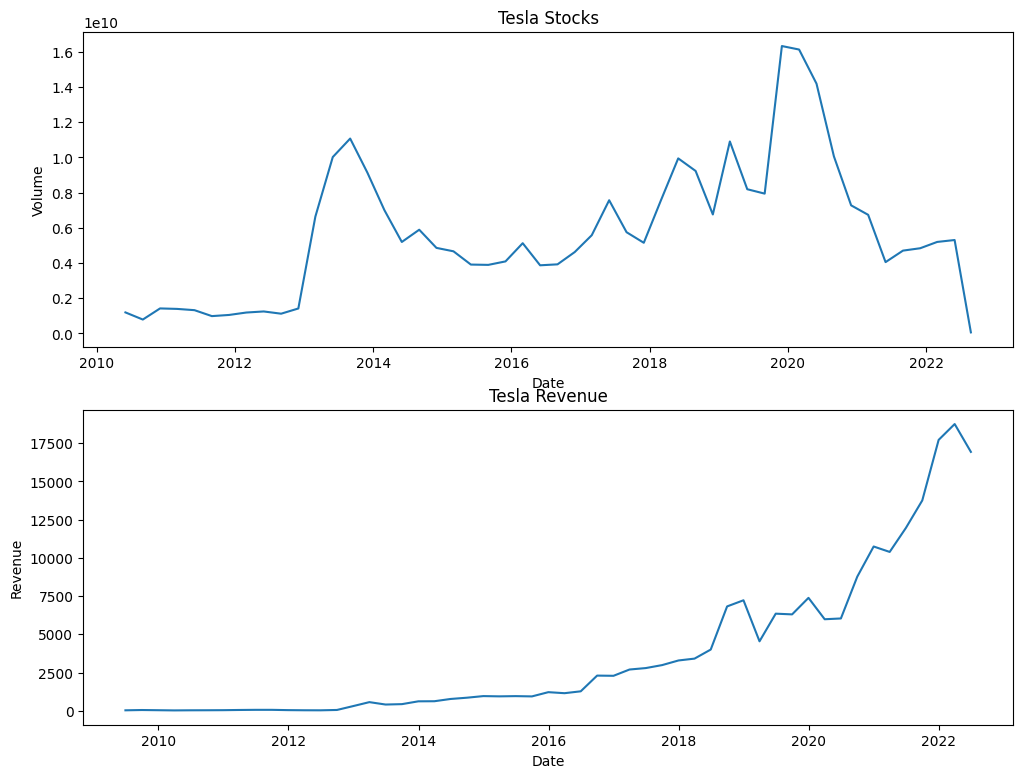

In [37]:
%matplotlib Inline
fig, axes = plt.subplots(2, figsize=(12, 9))

axes[0].set_title("Tesla Stocks")
sns.lineplot(x = "Date",
             y = "Volume",
             data = tesla_stock,
             ax =axes[0]);

axes[1].set_title("Tesla Revenue")
sns.lineplot(x = "Date",
             y = "Revenue",
             data = tesla_revenue,
             ax = axes[1]);


# #6 GameStop Stock and Revenue Dashboard

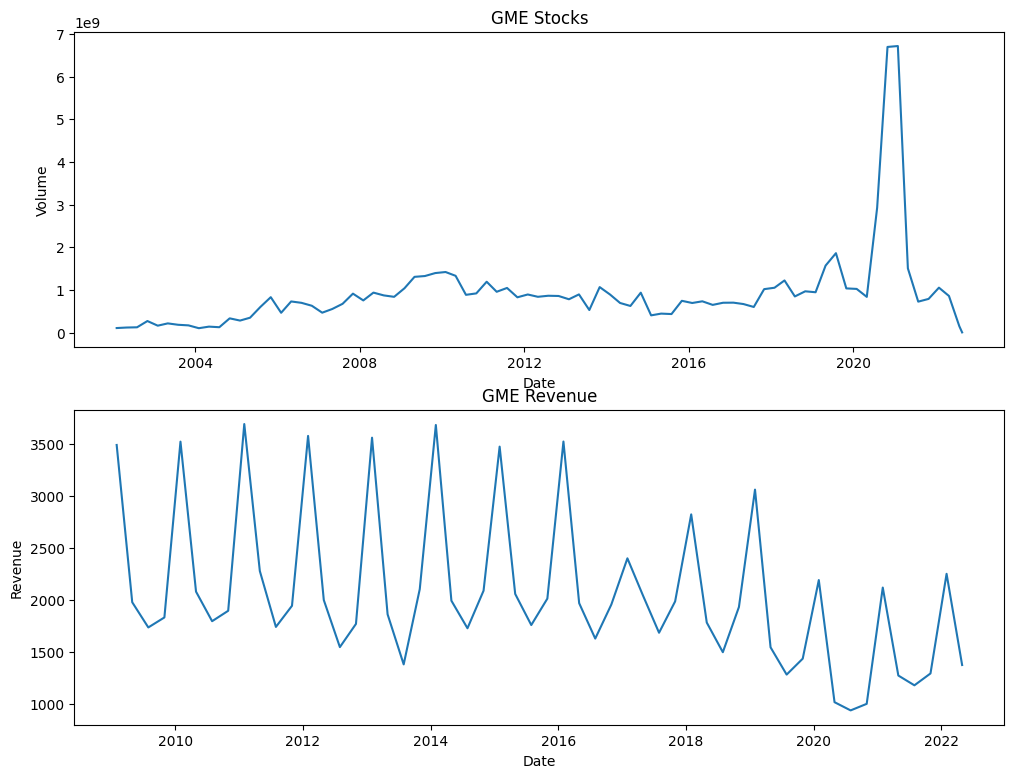

In [46]:
fig, axes = plt.subplots(2, figsize=(12, 9))

axes[0].set_title("GME Stocks")
sns.lineplot(x = "Date",
             y = "Volume",
             data = gme_stock,
             ax =axes[0]);

axes[1].set_title("GME Revenue")
sns.lineplot(x = "Date",
             y = "Revenue",
             data = gme_revenue,
             ax = axes[1]);